In [1]:
import os
import matplotlib.pyplot as plt
import collections


import numpy as np
import pandas as pd

In [2]:
KMNIST_DIR = "kmnist"

kmnist_files = sorted([os.path.join(KMNIST_DIR, filename) for filename in os.listdir(KMNIST_DIR) if filename.endswith("npz")])
kmnist_files

['kmnist/k49-test-imgs.npz',
 'kmnist/k49-test-labels.npz',
 'kmnist/k49-train-imgs.npz',
 'kmnist/k49-train-labels.npz']

In [3]:
def load(f):
    return np.load(f)['arr_0']

# Load the data
x_test = load(kmnist_files[0])
y_test = load(kmnist_files[1])
x_train = load(kmnist_files[2])
y_train = load(kmnist_files[3])


In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((232365, 28, 28), (38547, 28, 28), (232365,), (38547,))

In [ ]:
y_train[:5]

array([30, 19, 20, 30,  7], dtype=uint8)

In [ ]:
kmnist_labelmap_file = sorted([os.path.join(KMNIST_DIR, filename) for filename in os.listdir(KMNIST_DIR) if filename.endswith("csv")])
df_map = pd.read_csv(kmnist_labelmap_file[0])
df_map

,index,codepoint,char
0,0,U+3042,あ
1,1,U+3044,い
2,2,U+3046,う
3,3,U+3048,え
4,4,U+304A,お
5,5,U+304B,か
6,6,U+304D,き
7,7,U+304F,く
8,8,U+3051,け
9,9,U+3053,こ


In [ ]:
labels = df_map["char"].tolist()

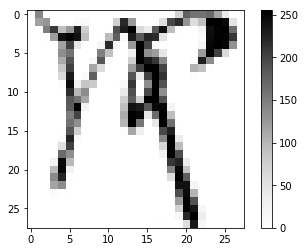

In [ ]:
plt.figure()
plt.imshow(x_train[12], cmap='Greys')
plt.colorbar()
# plt.grid(False)
plt.show()

In [ ]:
import matplotlib as mpl
import matplotlib.font_manager as fm

print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

print ('설정파일 위치: ', mpl.matplotlib_fname())
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print(len(font_list)) 

버전:  3.0.2
설치 위치:  /home/sc82choi/miniconda3/envs/tf20-alpha/lib/python3.7/site-packages/matplotlib/__init__.py
설정 위치:  /home/sc82choi/.config/matplotlib
캐시 위치:  /home/sc82choi/.cache/matplotlib
설정파일 위치:  /home/sc82choi/miniconda3/envs/tf20-alpha/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc
219


In [ ]:
plt.style.use('ggplot')
from matplotlib.font_manager import FontProperties
from matplotlib import rcParams

# フォントパスを指定 .ttf 形式でないと駄目な模様, 関連：https://github.com/matplotlib/matplotlib/pull/3912
font_path = '/home/sc82choi/.local/share/fonts/Osaka.ttc'
fp = FontProperties(fname=font_path, size=14)

# get_name() で 'Osaka' が返ってきています。メソッドの代わりに = 'Osaka' としてもOK
rcParams['font.family'] = fp.get_name()

In [ ]:



plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(labels[y_train[i]],  fontproperties=fp)
plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
## Hyper parameters
batch_size = 2048

In [ ]:
def prepare_features_and_labels(x, y):
    x = tf.cast(x, tf.float64) / 255.0
    x = tf.expand_dims(x, 2)
    y = tf.cast(y, tf.int8)
    return x, y

# df image_augmentation(x,y):    
#     brght_img = tf.reverse(tf_img, axis =[0]) #Verticle flipping
#     brght_img = tf.reverse(tf_img, axis =[1]) 
#     return

def mnist_train_dataset(images_npy, labels_npy, batch_size):
    ds = tf.data.Dataset.from_tensor_slices((images_npy, labels_npy))
    ds = ds.map(prepare_features_and_labels, num_parallel_calls=4 )
    ds = ds.shuffle(10000).repeat().batch(batch_size)
    return ds


def mnist_test_dataset(images_npy, labels_npy, batch_size=None):
    ds = tf.data.Dataset.from_tensor_slices((images_npy, labels_npy))
    ds = ds.map(prepare_features_and_labels)
    if batch_size is not None:
        ds = ds.shuffle(10000).repeat().batch(batch_size)
    else:
        ds = ds.repeat().batch(len(labels_npy))
    return ds

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=0)
train_index, dev_index = next(sss.split(x_train, y_train))

train_index.shape, dev_index.shape

In [ ]:
from tensorflow.keras.utils import to_categorical
train_dataset = mnist_train_dataset(x_train[train_index], y_train[train_index], batch_size)
val_dataset = mnist_test_dataset(x_train[dev_index], y_train[dev_index], batch_size)
test_dataset = mnist_test_dataset(x_test,y_test, batch_size)

In [ ]:


for row in val_dataset.take(5):
    print(collections.Counter(row[1].numpy().tolist()))

In [ ]:
train_size = len(x_train[train_index])
# train_size = len(y_resampled)
val_size = len(x_train[dev_index])
test_size = len(x_test)

train_size, val_size, test_size

In [ ]:
## Hyper parameters
learning_rate = 0.9
beta_1 = 0.9
beta_2 = 0.99
epsilon = 0.00001
epochs = 500

In [ ]:
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

input_shape = tf.expand_dims(x_train[0],2).shape
input_shape

In [ ]:
#Instantiate an empty model
model = Sequential([
Conv2D(64, (3, 3), input_shape=input_shape, padding='same', activation='relu'),
Conv2D(64, (3, 3), activation='relu', padding='same'),
MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
Conv2D(128, (3, 3), activation='relu', padding='same'),
Conv2D(128, (3, 3), activation='relu', padding='same',),
MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
Conv2D(256, (3, 3), activation='relu', padding='same',),
Conv2D(256, (3, 3), activation='relu', padding='same',),
Conv2D(256, (3, 3), activation='relu', padding='same',),
MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
Conv2D(512, (3, 3), activation='relu', padding='same',),
Conv2D(512, (3, 3), activation='relu', padding='same',),
Conv2D(512, (3, 3), activation='relu', padding='same',),
# MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
Conv2D(512, (3, 3), activation='relu', padding='same',),
Conv2D(512, (3, 3), activation='relu', padding='same',),
Conv2D(512, (3, 3), activation='relu', padding='same',),
MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
Flatten(),
Dense(4096, activation='relu'),
Dense(4096, activation='relu'),
Dense(49, activation='softmax')
])

model.summary()

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
# optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1, beta_2, epsilon)
optimizer = tf.keras.optimizers.SGD(lr=learning_rate, momentum=0.0, decay=0.001, nesterov=False)

In [ ]:
model.compile(optimizer, loss=loss_object, metrics=["accuracy"])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=20, restore_best_weights=True, monitor="val_accuracy")

In [ ]:
hist = model.fit(train_dataset, epochs=epochs, steps_per_epoch=train_size // batch_size,
          validation_data=val_dataset, validation_steps=val_size // batch_size,
                callbacks=[early_stopping])

Epoch 1/500
96/96 [==============================] - 50s 521ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.4584 - val_accuracy: 0.9511
Epoch 2/500
96/96 [==============================] - 50s 522ms/step - loss: 9.4366e-04 - accuracy: 0.9998 - val_loss: 0.4730 - val_accuracy: 0.9511
Epoch 3/500
96/96 [==============================] - 51s 526ms/step - loss: 7.4958e-04 - accuracy: 0.9998 - val_loss: 0.4849 - val_accuracy: 0.9509
Epoch 4/500
96/96 [==============================] - 51s 529ms/step - loss: 5.9540e-04 - accuracy: 0.9999 - val_loss: 0.4996 - val_accuracy: 0.9508
Epoch 5/500
96/96 [==============================] - 51s 529ms/step - loss: 5.1529e-04 - accuracy: 0.9999 - val_loss: 0.5112 - val_accuracy: 0.9506
Epoch 6/500
96/96 [==============================] - 51s 529ms/step - loss: 3.6354e-04 - accuracy: 1.0000 - val_loss: 0.5204 - val_accuracy: 0.9509
Epoch 7/500
96/96 [==============================] - 51s 528ms/step - loss: 3.2315e-04 - accuracy: 1.0000 - val_loss

In [28]:
score = model.evaluate(test_dataset, steps=1)

1/1 [==============================] - 0s 351ms/step - loss: 0.8251 - accuracy: 0.9126
